# We will now perform cross-validation on a simulated data set.
 
## (a) Generate a simulated data set as follows:
 rng = np.random.default_rng(1) , x = rng.normal(size=100) , y = x- 2 * x**2 + rng.normal(size=100)
## In this data set, what is n and what is p? Write out the model used to generate the data in equation form

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

rng = np.random.default_rng(1)  
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

data = pd.DataFrame({'X': x, 'Y': y})


n = data.shape[0]  #Number of observations
p = 1  #Number of predictors (X)
print(f"Number of observations (n): {n}")
print(f"Number of predictors (p): {p}")

Number of observations (n): 100
Number of predictors (p): 1


p為1是由於只用一個變量x跑出來的

## (b) Create a scatterplot of X against Y . Comment on what you find

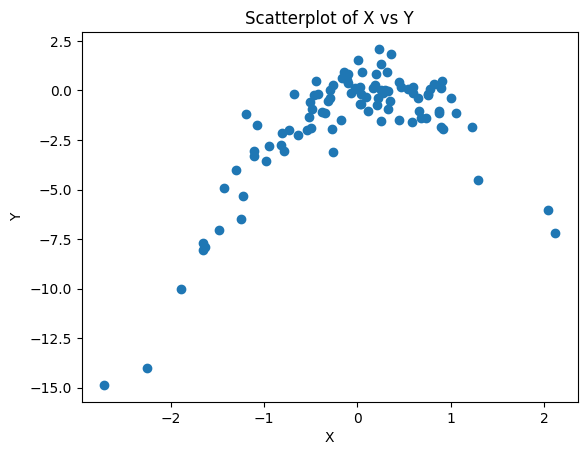

In [3]:
plt.scatter(data['X'], data['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X vs Y')
plt.show()

## (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
 i. Y = 0+ 1X+ , ii. Y = 0+ 1X+ 2X2+ , iii. Y = 0 + 1X+ 2X2+ 3X3+ , iv. Y = 0+ 1X+ 2X2+ 3X3+ 4X4+ .
## Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y 

In [ ]:
degrees = [1, 2, 3, 4]
loocv = LeaveOneOut()
loocv_errors = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    #Use negative mean squared error for scoring and negate to get positive MSE
    mse = -cross_val_score(model, data[['X']], data['Y'], cv=loocv, scoring='neg_mean_squared_error').mean()
    loocv_errors.append(mse)
    print(f"LOOCV error for degree {degree}: {mse}")


LOOCV error for degree 1: 6.633029839181983
LOOCV error for degree 2: 1.122936856341969
LOOCV error for degree 3: 1.301796548935887
LOOCV error for degree 4: 1.3323942694179374


# (d) Repeat (c) using another random seed, and report your results.Are your results the same as what you got in (c)? Why?

In [5]:
rng = np.random.default_rng(2)  #Change random seed
x_new = rng.normal(size=100)
y_new = x_new - 2 * x_new**2 + rng.normal(size=100)
data_new = pd.DataFrame({'X': x_new, 'Y': y_new})

loocv_errors_new = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    mse = -cross_val_score(model, data_new[['X']], data_new['Y'], cv=loocv, scoring='neg_mean_squared_error').mean()
    loocv_errors_new.append(mse)
    print(f"LOOCV error with new seed for degree {degree}: {mse}")

print("LOOCV errors with original seed:", loocv_errors)
print("LOOCV errors with new seed:", loocv_errors_new)

LOOCV error with new seed for degree 1: 7.560603694358579
LOOCV error with new seed for degree 2: 0.9840371744582584
LOOCV error with new seed for degree 3: 0.9682355765918605
LOOCV error with new seed for degree 4: 0.9659585554875687
LOOCV errors with original seed: [6.633029839181983, 1.122936856341969, 1.301796548935887, 1.3323942694179374]
LOOCV errors with new seed: [7.560603694358579, 0.9840371744582584, 0.9682355765918605, 0.9659585554875687]


Due to the sufficiently large sample size & stability of LOOCV,the result is almost same as (c)

# (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer

Model 2 has smallest LOOCV error since the structer of model is the closest to the data generating model of (a) of the four model.So no overfitting or no underfitting.

# (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [ ]:
import statsmodels.api as sm

#Degree 1 model
poly1 = PolynomialFeatures(1)
X_poly1 = poly1.fit_transform(data[['X']])
model1 = sm.OLS(data['Y'], X_poly1).fit()
print("Degree 1 model summary:")
print(model1.summary())

Degree 1 model summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.04e-09
Time:                        23:21:35   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0

In [22]:
#Degree 2 model
poly2 = PolynomialFeatures(2)
X_poly2 = poly2.fit_transform(data[['X']])
model2 = sm.OLS(data['Y'], X_poly2).fit()
print("\nDegree 2 model summary:")
print(model2.summary())


Degree 2 model summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     379.5
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.36e-46
Time:                        23:22:28   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             288.1
Df Residuals:                      97   BIC:                             295.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0728      

In [23]:
#Degree 3 model 
poly3 = PolynomialFeatures(3)
X_poly3 = poly3.fit_transform(data[['X']])
model3 = sm.OLS(data['Y'], X_poly3).fit()
print("\nDegree 3 model summary:")
print(model3.summary())


Degree 3 model summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     253.8
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.70e-45
Time:                        23:22:33   Log-Likelihood:                -140.47
No. Observations:                 100   AIC:                             288.9
Df Residuals:                      96   BIC:                             299.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0572      

In [24]:
#Degree 4 model
poly4 = PolynomialFeatures(4)
X_poly4 = poly4.fit_transform(data[['X']])
model4 = sm.OLS(data['Y'], X_poly4).fit()
print("\nDegree 4 model summary:")
print(model4.summary())


Degree 4 model summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     200.2
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           2.22e-45
Time:                        23:22:35   Log-Likelihood:                -137.74
No. Observations:                 100   AIC:                             285.5
Df Residuals:                      95   BIC:                             298.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1008      

From the R-square for each table.We can conclude that model 2,3,4 have statistical significance of the coefficient estimates.